In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('//content/creditcard.csv.zip')
df.info()

In [ ]:
df.describe()

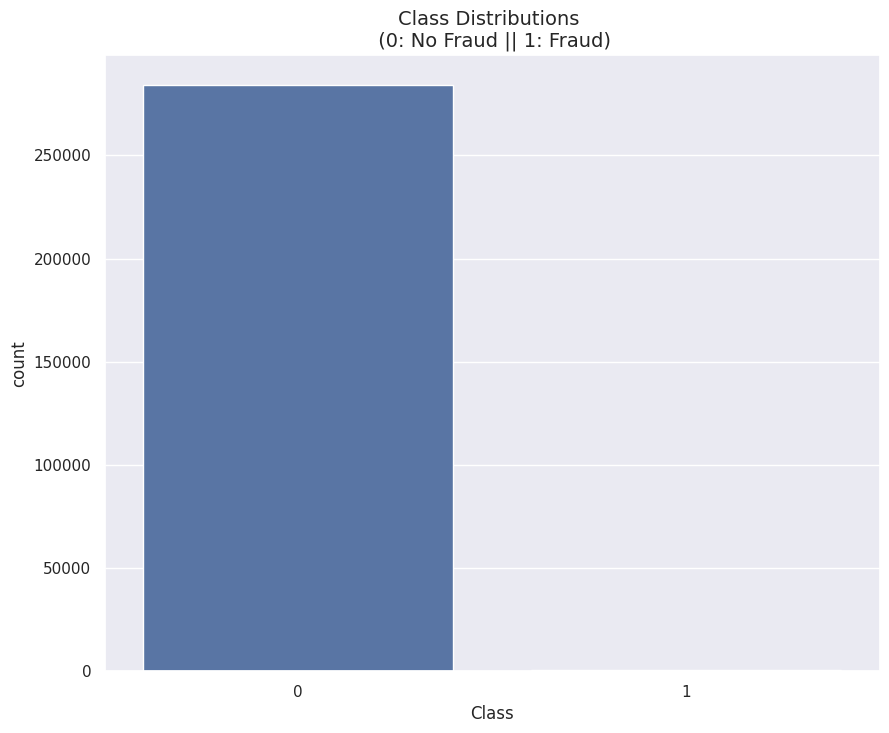

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [ ]:
df.isnull().sum().max()

0

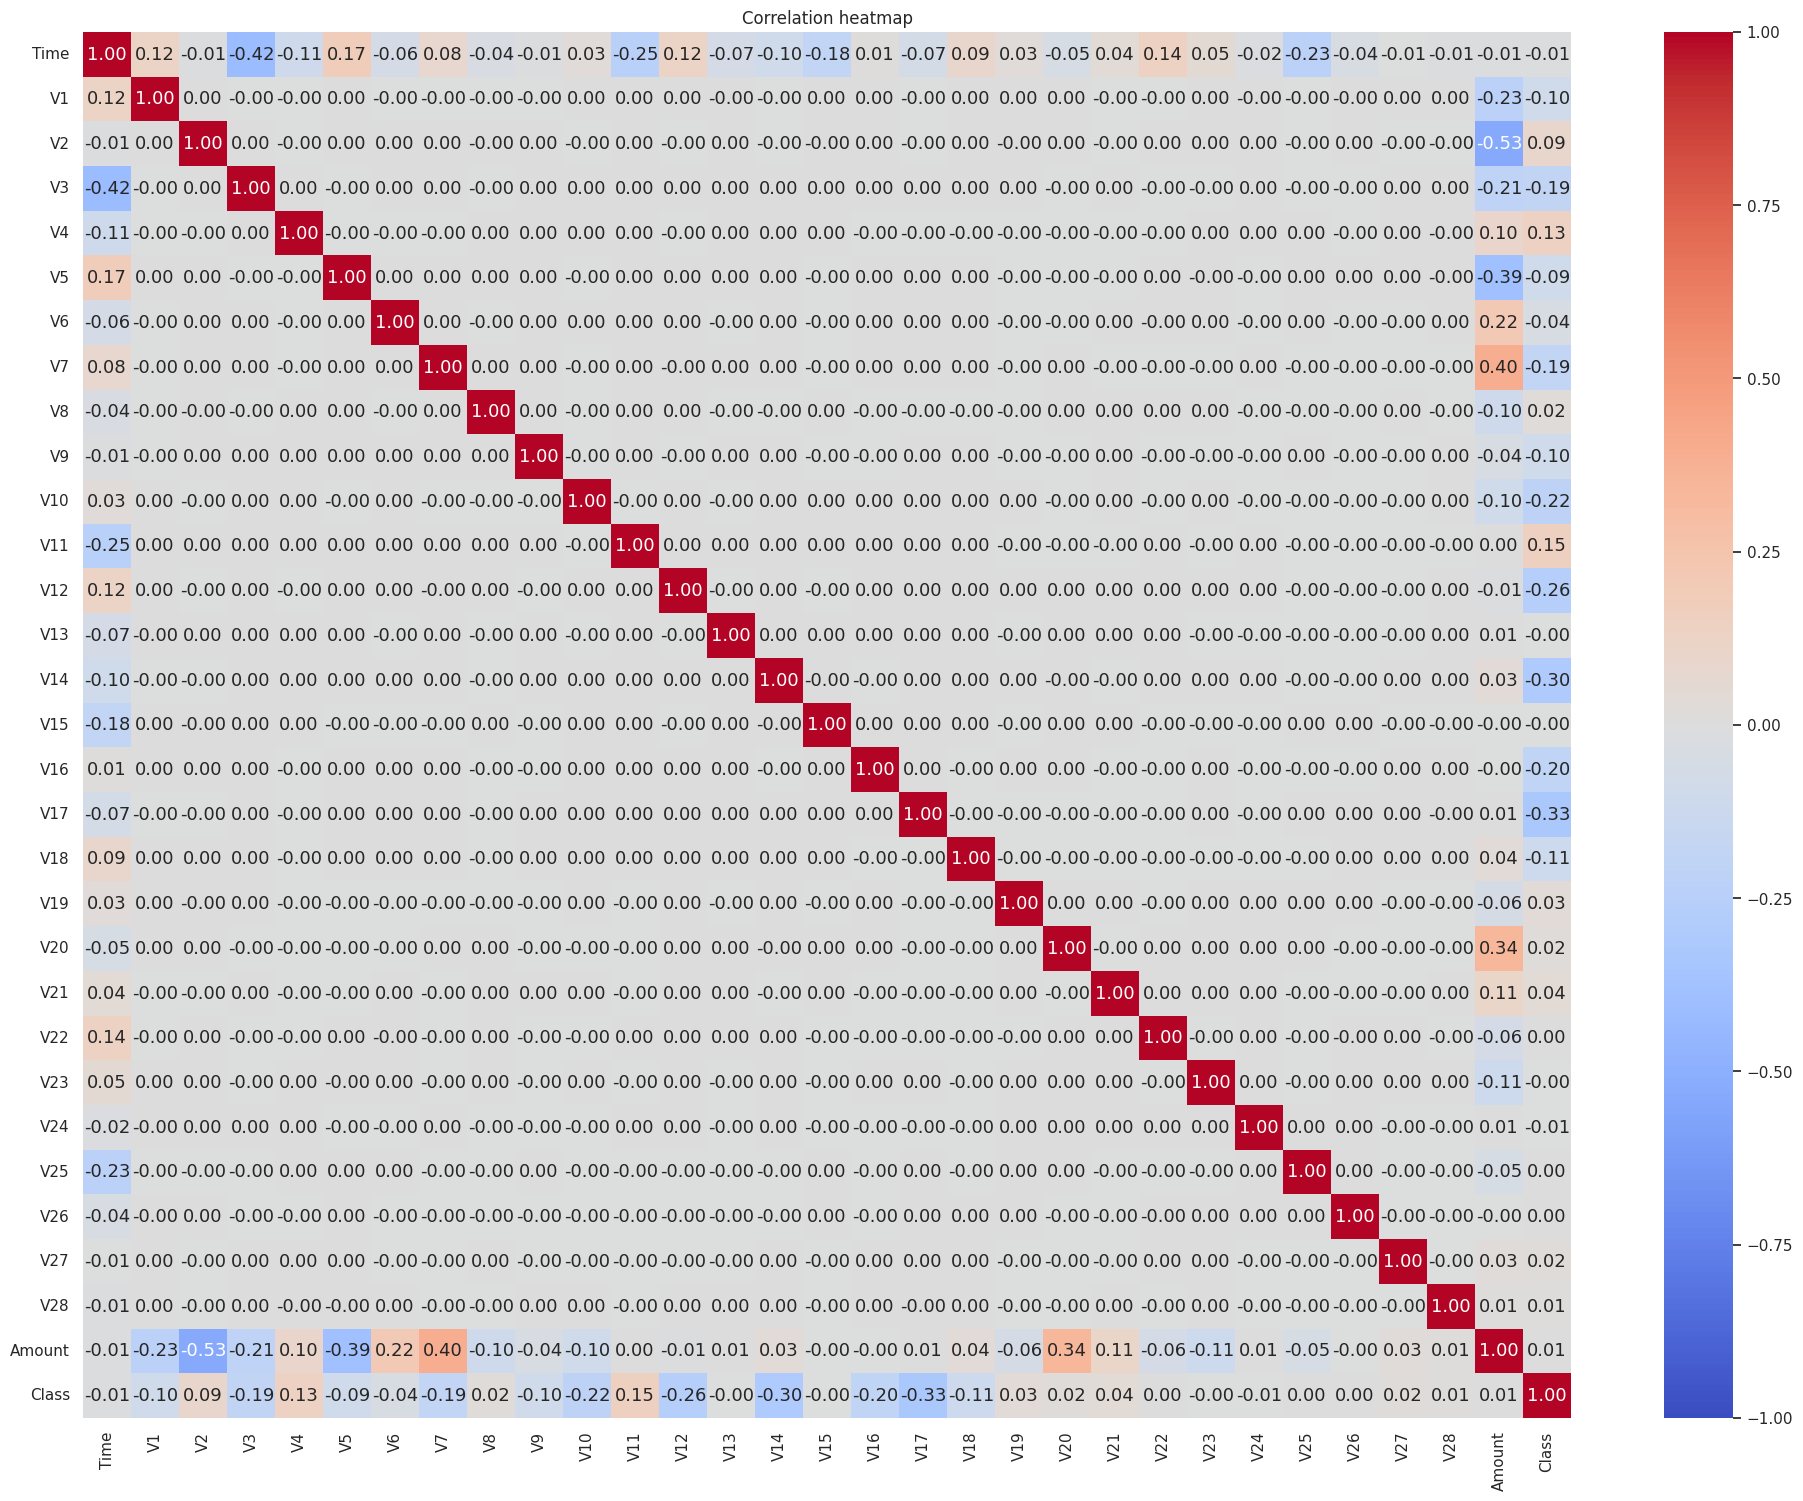

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 13},
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation heatmap')
plt.show()

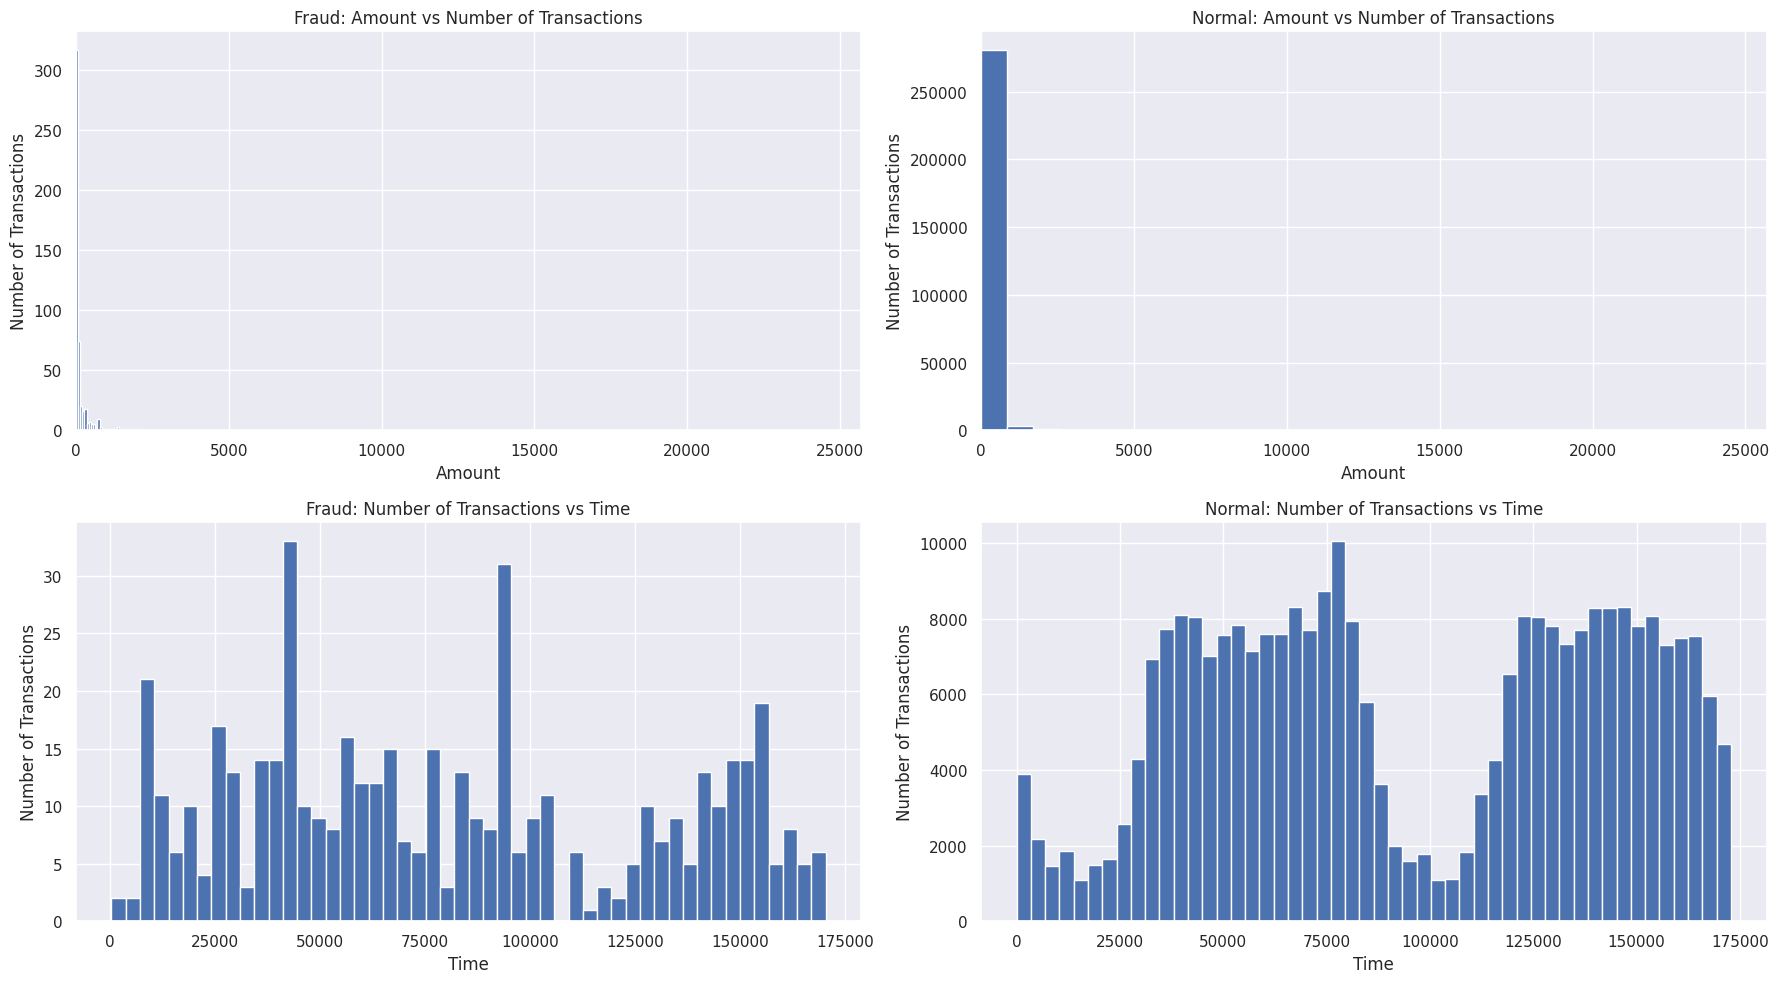

In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

max_amount = max(max(normal['Amount']), max(fraud['Amount']))

axes[0, 0].hist(fraud['Amount'], bins=30)
axes[0, 0].set_title('Fraud: Amount vs Number of Transactions')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].set_xlim(0, max_amount)
axes[0, 1].hist(normal['Amount'], bins=30)
axes[0, 1].set_title('Normal: Amount vs Number of Transactions')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].set_xlim(0, max_amount)

axes[1, 0].hist(fraud['Time'], bins=50)
axes[1, 0].set_title('Fraud: Number of Transactions vs Time')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Number of Transactions')

axes[1, 1].hist(normal['Time'], bins=50)
axes[1, 1].set_title('Normal: Number of Transactions vs Time')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

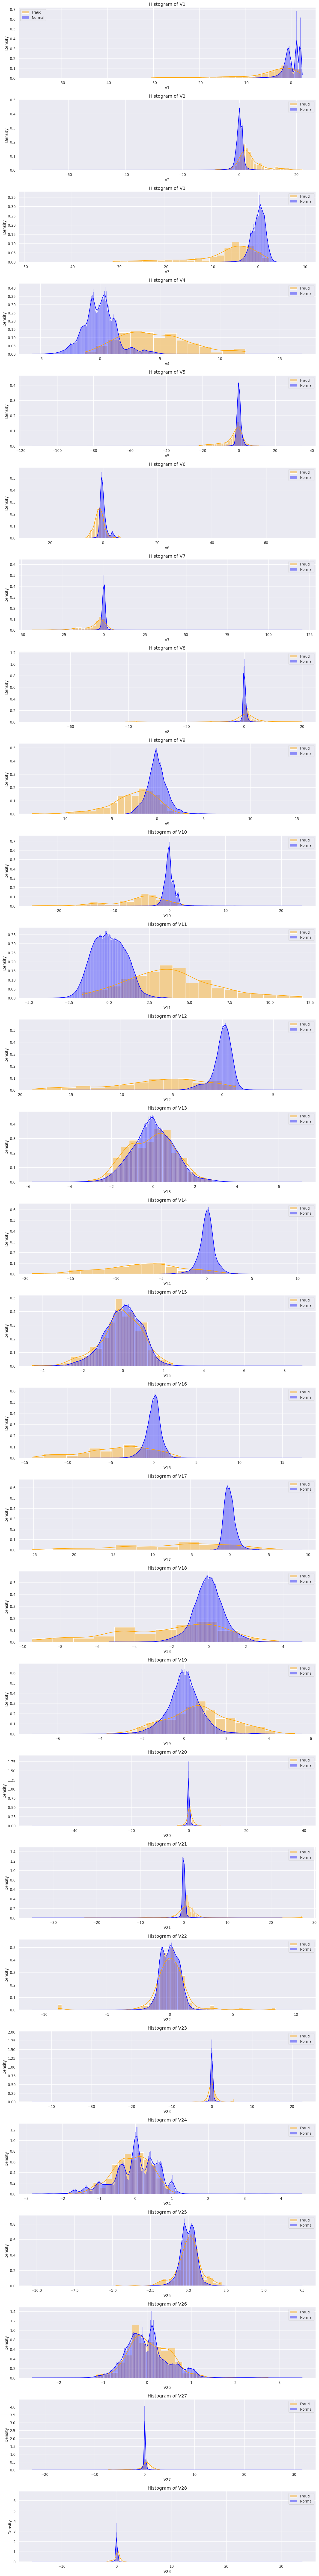

In [ ]:
num_features = df.iloc[:, 1:29].columns
num_rows = len(num_features)

fig, axes = plt.subplots(num_rows, 1, figsize=(14, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(fraud[col], kde=True, ax=axes[i], color='orange', label='Fraud', stat='density', alpha=0.4, edgecolor=None)
    sns.histplot(normal[col], kde=True, ax=axes[i], color='blue', label='Normal', stat='density', alpha=0.4, edgecolor=None)
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].legend()


plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
import joblib

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

scoring = {
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}
for name, model in models.items():
    scores = cross_validate(model, X_test, y_test, cv=5, scoring=scoring, return_train_score=False)
    print(name, "No SMOTE")
    print("AUC-ROC:   ", scores['test_roc_auc'])
    print("Precision: ", scores['test_precision'])
    print("Recall:    ", scores['test_recall'])
    print("")
    scores = cross_validate(model, X_test_smote, y_test_smote, cv=5, scoring=scoring, return_train_score=False)
    print(name, "SMOTE")
    print("AUC-ROC:   ", scores['test_roc_auc'])
    print("Precision: ", scores['test_precision'])
    print("Recall:    ", scores['test_recall'])
    print("")

LogisticRegression No SMOTE
AUC-ROC:    [0.99971424 0.93150444 0.92898694 0.99944004 0.95110798]
Precision:  [0.82352941 0.90909091 0.78571429 0.75       0.84615385]
Recall:     [0.7        0.5        0.57894737 0.47368421 0.55      ]

LogisticRegression SMOTE
AUC-ROC:    [0.99050657 0.98920266 0.99031529 0.9920813  0.99106411]
Precision:  [0.97785433 0.9729207  0.97367161 0.97040573 0.97251688]
Recall:     [0.87340659 0.88478452 0.8944591  0.89401935 0.88659341]

SVM No SMOTE
AUC-ROC:    [0.99970984 0.90939066 0.89132618 0.99965755 0.89253429]
Precision:  [0.85714286 1.         1.         1.         0.85714286]
Recall:     [0.6        0.35       0.31578947 0.36842105 0.3       ]

SVM SMOTE
AUC-ROC:    [0.99960516 0.99961759 0.99962938 0.99953067 0.99958286]
Precision:  [0.98856359 0.98991288 0.99136364 0.98863636 0.98866213]
Recall:     [0.94989011 0.94942832 0.9591029  0.95646438 0.95824176]

DecisionTree No SMOTE
AUC-ROC:    [0.87469225 0.84978018 0.84197337 0.94710464 0.87482413]
P

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

model = XGBClassifier(n_estimators=100, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_test_smote, y_test_smote)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train_smote, y_train_smote)
joblib.dump(model, f"XGBoost.pkl")
print(f"Model XGBoost saved")

Model XGBoost saved


Confusion matrix:
[[56819    45]
 [   15    83]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.85      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962

0.9784778289481241


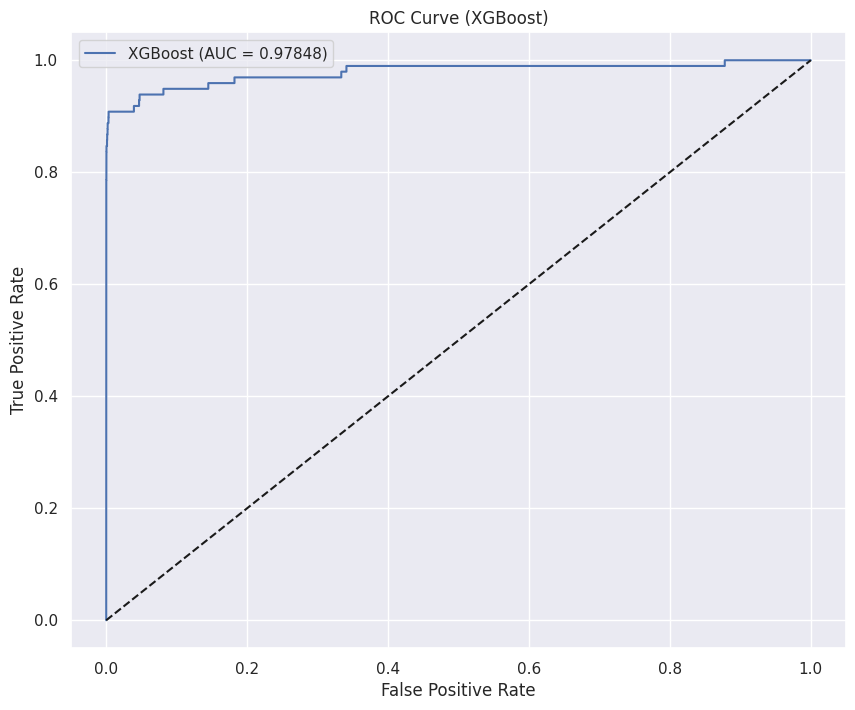

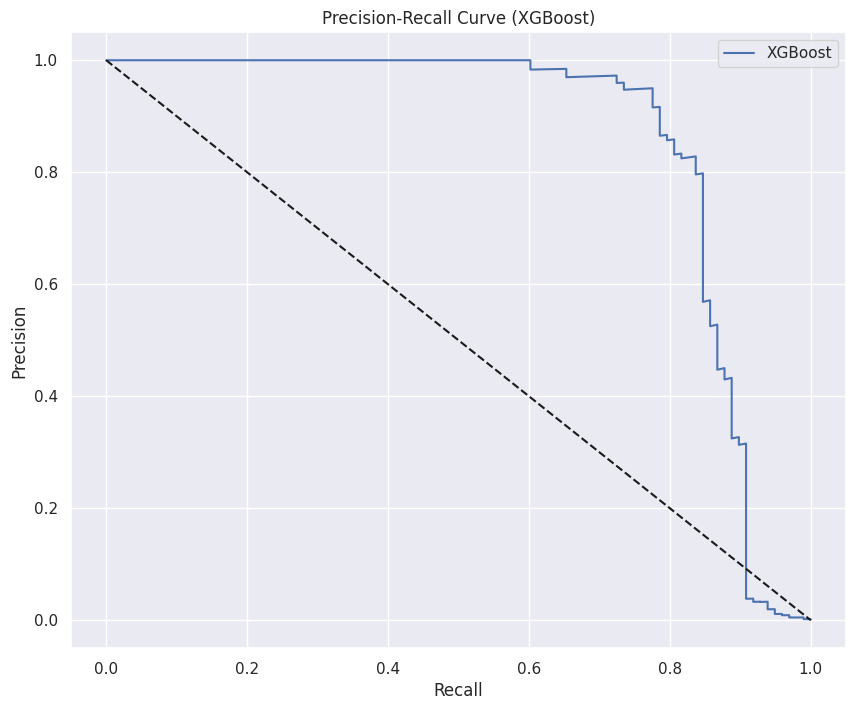

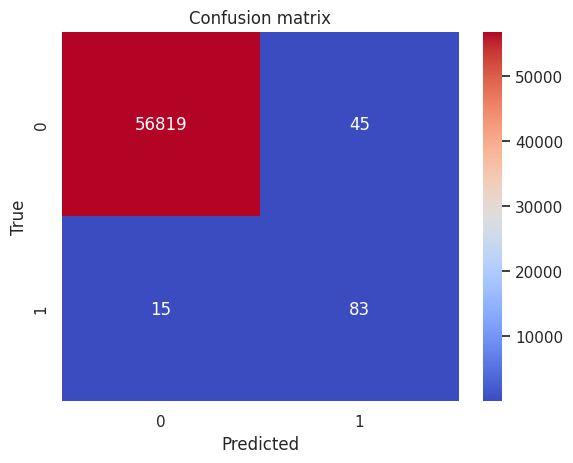

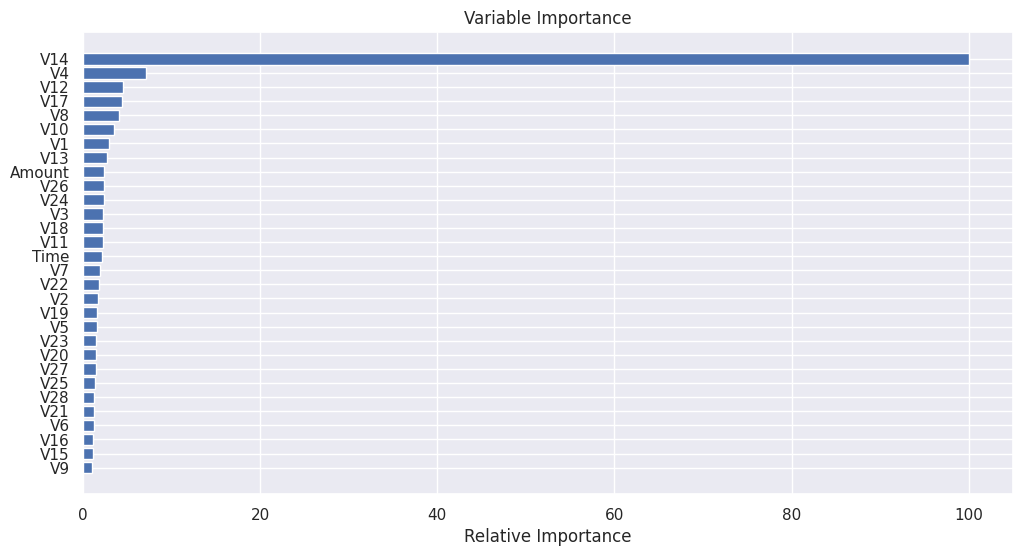

In [ ]:
model = joblib.load("XGBoost.pkl")

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print(auc_score)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.5f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()



precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label=f"XGBoost")
plt.plot([0, 1], [1, 0], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()


feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()